# 양자 비트, 게이트, 회로

<Admonition type="note">
  Kifumi Numata (2024년 4월 19일)

  원본 강의의 PDF를 다운로드하려면 [여기](https://ibm.ent.box.com/public/static/vee9e1kkxxiih5g8yqdhoo6t0o3dw7xf.zip)를 클릭하세요. 일부 코드 스니펫은 정적 이미지이므로 더 이상 사용되지 않을 수 있습니다.

  *이 실험을 실행하는 데 필요한 대략적인 QPU 시간은 5초입니다.*
</Admonition>

## 1. 소개

비트, 게이트, 회로는 양자 컴퓨팅의 기본 구성 요소입니다. 양자 비트와 게이트를 사용하여 회로 모델로 양자 계산을 배우고, 중첩, 측정, 얽힘에 대해서도 복습합니다.

이 강의에서 배울 내용:

*   단일 큐비트 게이트
*   블로흐 구
*   중첩
*   측정
*   2큐비트 게이트와 얽힘 상태

이 강의가 끝나면, 실용 규모의 양자 컴퓨팅에 필수적인 회로 깊이에 대해 배우게 됩니다.

## 2. 다이어그램으로 표현하는 계산

큐비트나 비트를 사용할 때, 입력을 필요한 출력으로 변환하기 위해 조작해야 합니다. 비트 수가 매우 적은 가장 간단한 프로그램의 경우, 이 과정을 *회로 다이어그램*이라는 그림으로 표현하는 것이 유용합니다.

아래 왼쪽 그림은 고전적 회로의 예이고, 아래 오른쪽 그림은 양자 회로의 예입니다. 두 경우 모두 입력은 왼쪽에, 출력은 오른쪽에 있으며, 연산은 기호로 표현됩니다. 연산에 사용되는 기호는 주로 역사적인 이유로 "게이트"라고 불립니다.

!["고전 논리 및 양자 회로"](/learning/images/courses/utility-scale-quantum-computing/bits-gates-and-circuits/classical-vs-quantum.avif)

## 3. 단일 큐비트 양자 게이트

### 3.1 양자 상태와 블로흐 구

큐비트의 상태는 $|0\rangle$과 $|1\rangle$의 중첩으로 표현됩니다. 임의의 양자 상태는 다음과 같이 표현됩니다.

$$
|\psi\rangle =\alpha|0\rangle+ \beta|1\rangle
$$

여기서 $\alpha$와 $\beta$는 $|\alpha|^2+|\beta|^2=1$을 만족하는 복소수입니다.

$|0\rangle$과 $|1\rangle$은 2차원 복소 벡터 공간의 벡터입니다:

$$
|0\rangle = \begin{pmatrix}
1 \\0
\end{pmatrix},
|1\rangle = \begin{pmatrix}
0\\1
\end{pmatrix}
$$

따라서, 임의의 양자 상태는 다음과 같이도 표현됩니다.

$$
|\psi\rangle = \alpha\begin{pmatrix}
1 \\ 0
\end{pmatrix} + \beta\begin{pmatrix}0\\
1
\end{pmatrix} = \begin{pmatrix}
\alpha \\ \beta
\end{pmatrix}
$$

이를 통해, 양자 비트의 상태는 $|0\rangle$과 $|1\rangle$을 정규직교 기저로 하는 2차원 복소 내적 공간의 단위 벡터임을 알 수 있습니다. 1로 정규화되어 있습니다.

$$
\langle\psi|\psi\rangle = \begin{pmatrix}
\alpha^* & \beta^*
\end{pmatrix}
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix} = 1
$$

$ |\psi\rangle =\begin{pmatrix}
\alpha \\ \beta
\end{pmatrix}$는 상태벡터(statevector)라고도 합니다.

단일 큐비트 양자 상태는 다음과 같이도 표현됩니다.

$$
|\psi\rangle
=\cos\frac{\theta}{2}|0\rangle+e^{i\varphi}\sin\frac{\theta}{2}|1\rangle
=\left( \begin{pmatrix} \cos\frac{\theta}{2}\\ e^{i\varphi}\sin\frac{\theta}{2}
\end{pmatrix}\right)
$$

여기서 $\theta$와 $\varphi$는 아래 그림의 블로흐 구의 각도입니다.

![블로흐 구](/learning/images/courses/utility-scale-quantum-computing/bits-gates-and-circuits/bloch.avif)

다음 몇 개의 코드 셀에서는 Qiskit의 구성 요소로부터 기본 계산을 구축합니다. 빈 회로를 구성한 다음 양자 연산을 추가하면서, 게이트에 대해 논의하고 그 효과를 시각화합니다.
"Shift" + "Enter"로 셀을 실행할 수 있습니다. 먼저 라이브러리를 임포트합니다.

In [7]:
import os
from pathlib import Path

cache = Path.home() / ".cache" / "matplotlib"
cache.mkdir(parents=True, exist_ok=True)
os.environ["MPLCONFIGDIR"] = str(cache)

In [8]:
!pip install qiskit
!pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install pylatexenc


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# qiskit 라이브러리 임포트
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit_ibm_runtime import Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

#### 양자 회로 준비

단일 큐비트 회로를 생성하고 그립니다.

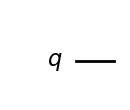

In [11]:
# 단일 큐비트 양자 회로 생성
qc = QuantumCircuit(1)

# 회로 그리기
qc.draw("mpl")

#### X 게이트

X 게이트는 블로흐 구의 $x$ 축을 중심으로 $\pi$ 회전하는 게이트입니다.
X 게이트를 $|0\rangle$에 적용하면 $|1\rangle$이 되고, $|1\rangle$에 적용하면 $|0\rangle$이 됩니다. 따라서 고전적 NOT 게이트와 유사한 연산이며, 비트 플립(bit flip)이라고도 합니다. X 게이트의 행렬 표현은 아래와 같습니다.

$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
$$

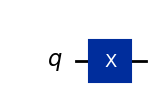

In [12]:
qc = QuantumCircuit(1)  # 단일 큐비트 양자 회로 준비

# 큐비트 0에 X 게이트 적용
qc.x(0)

# 회로 그리기
qc.draw("mpl")

IBM Quantum®에서 초기 상태는 $|0\rangle$으로 설정되므로, 위의 양자 회로를 행렬 표현으로 나타내면

$$
X|0\rangle=  \begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}
\begin{pmatrix}
1 \\ 0
\end{pmatrix}
 =\begin{pmatrix}
0 \\ 1
\end{pmatrix} = |1\rangle
$$

다음으로, 상태벡터 시뮬레이터를 사용하여 이 회로를 실행해 봅시다.

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


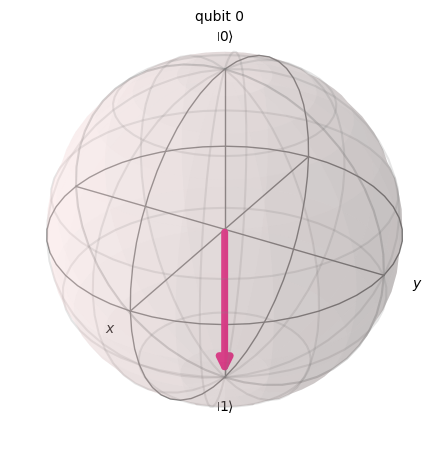

In [13]:
# 상태벡터 확인
out_vector = Statevector(qc)
print(out_vector)

# 블로흐 구 그리기
plot_bloch_multivector(out_vector)

수직 벡터가 행 벡터로 표시되며, 복소수를 포함합니다 (허수부는 $j$로 표시됩니다).

#### H 게이트

아다마르 게이트는 블로흐 구의 $x$ 축과 $z$ 축 사이의 축을 중심으로 $\pi$ 회전하는 게이트입니다. H 게이트를 $|0\rangle$에 적용하면 $\frac{|0\rangle + |1\rangle}{\sqrt{2}}$와 같은 중첩 상태가 생성됩니다. H 게이트의 행렬 표현은 아래와 같습니다.

$$
H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}
$$

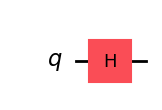

In [14]:
qc = QuantumCircuit(1)  # 단일 큐비트 양자 회로 생성

# 큐비트 0에 아다마르 게이트 적용
qc.h(0)

# 회로 그리기
qc.draw(output="mpl")

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


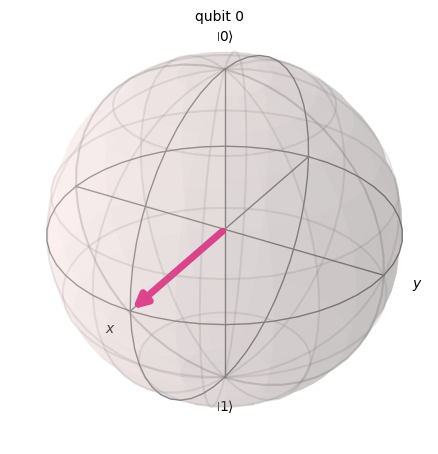

In [15]:
# 상태벡터 확인
out_vector = Statevector(qc)
print(out_vector)

# 블로흐 구 그리기
plot_bloch_multivector(out_vector)

이것은

$$
H|0\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
\begin{pmatrix}
1 \\0
\end{pmatrix}
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\
1
\end{pmatrix}
=\begin{pmatrix}
0.707 \\
0.707
\end{pmatrix}
=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)
$$

이 중첩 상태는 매우 일반적이고 중요하여, 고유한 기호가 부여됩니다:

$$
|+\rangle \equiv \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle).
$$

$|0\rangle$에 $H$ 게이트를 적용하여, 계산 기저(블로흐 구에서 z축 방향)로 측정했을 때 각 상태가 동일한 확률로 나오는 $|0\rangle$과 $|1\rangle$의 중첩을 만들었습니다.

#### $|-\rangle$ 상태

대응하는 $|-\rangle$ 상태가 있다는 것을 짐작하셨을 것입니다:

$$
|-\rangle \equiv \frac{|0\rangle -|1\rangle}{\sqrt{2}}.
$$

이 상태를 만들려면, 먼저 X 게이트를 적용하여 $|1\rangle$을 만든 다음, H 게이트를 적용합니다.

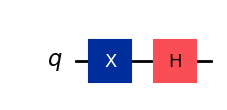

In [16]:
qc = QuantumCircuit(1)  # 단일 큐비트 양자 회로 생성

# 큐비트 0에 X 게이트 적용
qc.x(0)

# 큐비트 0에 아다마르 게이트 적용
qc.h(0)

# 회로 그리기
qc.draw(output="mpl")

Statevector([ 0.70710678+0.j, -0.70710678+0.j],
            dims=(2,))


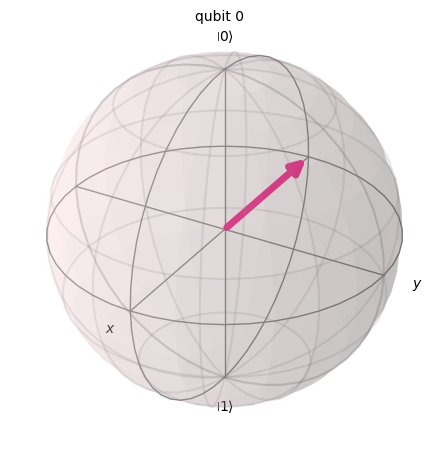

In [17]:
# 상태벡터 확인
out_vector = Statevector(qc)
print(out_vector)

# 블로흐 구 그리기
plot_bloch_multivector(out_vector)

이것은

$$
H|1\rangle= \frac{1}{\sqrt{2}} \begin{pmatrix}
1 & 1 \\\
1 & -1
\end{pmatrix}
\begin{pmatrix}
0 \\\
1
\end{pmatrix}
 =\frac{1}{\sqrt{2}}\begin{pmatrix}
1 \\\
-1
\end{pmatrix}
=\begin{pmatrix}
0.707 \\\
-0.707
\end{pmatrix}
=\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = |-\rangle
$$

$|1\rangle$에 $H$ 게이트를 적용하면 $|0\rangle$과 $|1\rangle$의 동일한 중첩이 되지만, $|1\rangle$의 부호가 음수입니다.

### 3.2 단일 큐비트 양자 상태와 유니터리 진화

지금까지 본 모든 게이트의 작용은 *유니터리*였으며, 이는 유니터리 연산자로 표현할 수 있음을 의미합니다. 즉, 출력 상태는 초기 상태에 유니터리 행렬을 작용시켜 얻을 수 있습니다:

$$
|\psi^{'}\rangle = U|\psi\rangle
$$

유니터리 행렬은 다음을 만족하는 행렬입니다.

$$
U^{\dagger}U =U U^{\dagger} = I.
$$

양자 컴퓨터 연산의 관점에서, 큐비트에 양자 게이트를 적용하면 양자 상태가 진화한다고 말합니다. 일반적인 단일 큐비트 게이트는 다음과 같습니다.

파울리 게이트:

$$
X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}
= |0\rangle \langle 1|+|1\rangle \langle 0|
$$

$$
Y = \begin{pmatrix}
0 & -i \\
i & 0 \\
\end{pmatrix}
= -i|0\rangle \langle 1|+i|1\rangle \langle 0|
$$

$$
Z = \begin{pmatrix}
1 & 0 \\
0 & -1 \\
\end{pmatrix}
= |0\rangle \langle 0|-|1\rangle \langle 1|
$$

여기서 외적은 다음과 같이 계산되었습니다:

$$
|0\rangle \langle 0|=
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}
=\begin{bmatrix}
1 & 0 \\
0 & 0 \\
\end{bmatrix}, \quad
|1\rangle \langle 0|=
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}
=\begin{bmatrix}
0 & 0 \\
1 & 0 \\
\end{bmatrix}, \quad
$$

$$
|0\rangle \langle 1|=
\begin{bmatrix}
1 \\
0
\end{bmatrix}
\begin{bmatrix}
0 & 1
\end{bmatrix}
=\begin{bmatrix}
0 & 1 \\
0 & 0 \\
\end{bmatrix}, \quad
|1\rangle \langle 1|=
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\begin{bmatrix}
0 & 1
\end{bmatrix}
=\begin{bmatrix}
0 & 0 \\
0 & 1 \\
\end{bmatrix}, \quad
$$

그 외 대표적인 단일 큐비트 게이트:

$$
H= \frac{1}{\sqrt{2}}\begin{bmatrix}
1 & 1 \\
1 & -1 \\
\end{bmatrix},\quad
S = \begin{bmatrix}
1 & 0 \\
0 & i \\
\end{bmatrix}, \quad
T = \begin{bmatrix}
1 & 0 \\
0 & exp(i\pi/4) \\
\end{bmatrix}
$$

$$
R_x(\theta) = e^{-i\theta X/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}X = \begin{bmatrix}
cos\frac{\theta}{2} &  -i sin \frac{\theta}{2} \\
-i sin \frac{\theta}{2} & cos\frac{\theta}{2} \\
\end{bmatrix}
$$

$$
R_y(\theta) = e^{-i\theta Y/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}Y = \begin{bmatrix}
cos\frac{\theta}{2} &  - sin \frac{\theta}{2} \\
sin \frac{\theta}{2} & cos\frac{\theta}{2} \\
\end{bmatrix}
$$

$$
R_z(\theta) = e^{-i\theta Z/2} = cos\frac{\theta}{2}I - i sin \frac{\theta}{2}Z = \begin{bmatrix}
e^{-i\theta /2} &  0 \\
0 & e^{i\theta /2} \\
\end{bmatrix}
$$

이들의 의미와 사용법은 [양자 정보의 기초](/learning/courses/basics-of-quantum-information) 과정에서 더 자세히 설명되어 있습니다.

### 연습 1

Qiskit을 사용하여 아래에 설명된 상태를 준비하는 양자 회로를 만드세요. 그런 다음 각 회로를 상태벡터 시뮬레이터로 실행하고 결과 상태를 블로흐 구에 표시하세요. 보너스로, 게이트와 블로흐 구에서의 회전에 대한 직관을 바탕으로 최종 상태가 어떻게 될지 예측해 보세요.

(3) $HZH|0\rangle$

팁: Z 게이트는 다음과 같이 사용할 수 있습니다.

qc.z(0)

**풀이:**

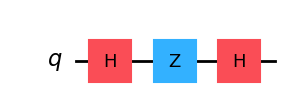

In [18]:
### (3) HZH|0> ###
## 여기에 코드를 작성하세요 ##
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
qc.draw("mpl")

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


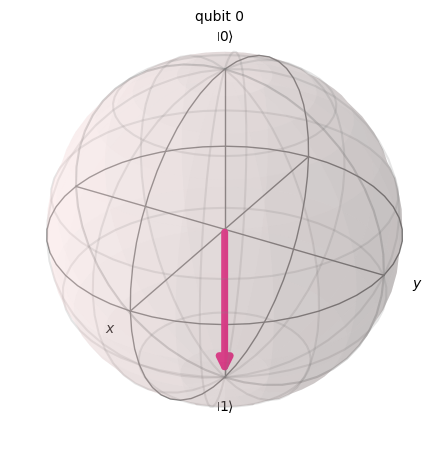

In [19]:
# 상태벡터 확인
out_vector = Statevector(qc)
print(out_vector)

# 블로흐 구 그리기
plot_bloch_multivector(out_vector)

### 3.3 측정

측정은 이론적으로 매우 복잡한 주제입니다. 하지만 실용적으로, $z$축 방향의 측정(모든 IBM® 양자 컴퓨터가 수행하는 방식)은 단순히 큐비트의 상태 $\alpha|0\rangle+\beta|1\rangle \quad (단, |\alpha|^2+|\beta|^2=1)$를 $|0\rangle$ 또는 $|1\rangle$로 강제하고, 결과를 관측합니다.

*   $|\alpha|^2$는 측정 시 $|0\rangle$을 얻을 확률입니다.
*   $|\beta|^2$는 측정 시 $|1\rangle$을 얻을 확률입니다.

따라서, $\alpha$와 $\beta$는 확률 진폭이라고 합니다. ("보른 규칙" 참조)

예를 들어, $\frac{\sqrt{2}}{2}|0\rangle+\frac{\sqrt{2}}{2}|1\rangle$는 측정 시 $|0\rangle$ 또는 $|1\rangle$이 될 확률이 동일합니다. $\frac{\sqrt{3}}{2}|0\rangle-\frac{1}{2}i|1\rangle$는 $|0\rangle$이 될 확률이 75%입니다.

#### Qiskit Aer 시뮬레이터

다음으로, 위의 동일 확률 중첩을 준비하는 회로를 측정해 봅시다.
측정 게이트를 추가해야 합니다. Qiskit Aer 시뮬레이터는 기본적으로 이상적인(노이즈 없는) 양자 하드웨어를 시뮬레이션합니다. 참고: Aer 시뮬레이터는 실제 양자 컴퓨터를 기반으로 한 노이즈 모델도 적용할 수 있습니다. 노이즈 모델에 대해서는 나중에 다시 다룹니다.

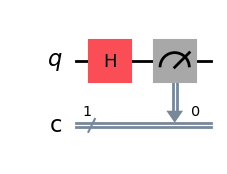

In [20]:
# 큐비트 1개(첫 번째 인수)와 고전 비트 1개(두 번째 인수)로 새 회로 생성
# qc = QuantumCircuit(2, 2)
qc = QuantumCircuit(1, 1)

qc.h(0)

# qc.h(1)
# qc.x(1)
# qc.x(1)
# qc.cx(0,1)
# qc.cx(1,0)

qc.measure(0, 0)  # 측정 게이트 추가
# qc.measure(1, 1)  # 측정 게이트 추가


qc.draw(output="mpl")

이제 Aer 시뮬레이터에서 회로를 실행할 준비가 되었습니다. 이 예제에서는 기본값 shots=1024를 적용하여, 1024회 측정합니다. 그런 다음 그 횟수를 히스토그램으로 그립니다.

{'1': 519, '0': 505}


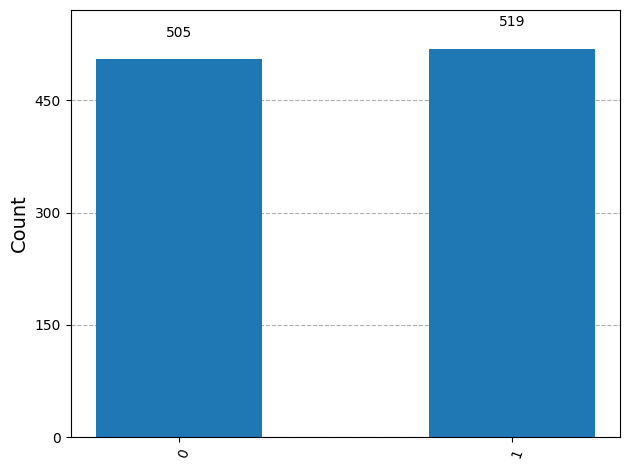

In [21]:
# 시뮬레이터에서 회로를 실행하여 결과 얻기
# 백엔드 정의
backend = AerSimulator()

# 백엔드에 트랜스파일
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# 작업 실행
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc])
result = job.result()

# 결과 출력
counts = result[0].data.c.get_counts()
print(counts)

# 횟수를 히스토그램으로 그리기
plot_histogram(counts)

0과 1이 각각 거의 50%의 확률로 측정된 것을 볼 수 있습니다. 여기서는 노이즈가 시뮬레이션되지 않았지만, 상태는 여전히 확률적입니다. 따라서 대략 50-50 분포를 기대하지만, 정확히 그렇게 되는 경우는 드뭅니다. 마치 동전을 100번 던져도 정확히 각 면이 50번씩 나오는 경우가 드문 것과 같습니다.

## 4. 다중 큐비트 양자 게이트와 얽힘

### 4.1 다중 큐비트 양자 회로

다음 코드로 2큐비트 양자 회로를 생성할 수 있습니다. 각 큐비트에 H 게이트를 적용합니다.

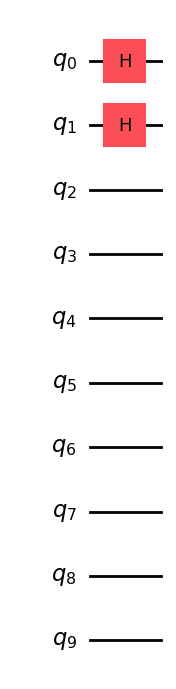

In [22]:
# 2큐비트 양자 회로 생성
qc = QuantumCircuit(10)

# 큐비트 0에 H 게이트 적용
qc.h(0)

# 큐비트 1에 H 게이트 적용
qc.h(1)

# 회로 그리기
qc.draw(output="mpl")

In [23]:
# 상태벡터 확인
out_vector = Statevector(qc)
print(out_vector)

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, ..., 0. +0.j, 0. +0.j, 0. +0.j],
            dims=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2))


#### 참고: Qiskit 비트 순서

Qiskit은 큐비트와 비트를 정렬할 때 **리틀 엔디안** 표기법을 사용합니다. 즉, **큐비트 0이 비트 문자열의 가장 오른쪽 비트**입니다. 예: $|01\rangle$은 q0이 $|1\rangle$이고 q1이 $|0\rangle$임을 의미합니다. 양자 컴퓨팅의 일부 문헌은 빅 엔디안 표기법(큐비트 0이 가장 왼쪽 비트)을 사용하며, 많은 양자역학 문헌도 마찬가지이므로 주의하세요.

또한, 양자 회로를 표현할 때 $|q_0\rangle$은 항상 회로의 맨 위에 배치됩니다.

이를 염두에 두면, 위 회로의 양자 상태는 단일 큐비트 양자 상태의 텐서 곱으로 쓸 수 있습니다.

$|q1\rangle \otimes|q0\rangle = (a|0\rangle+b|1\rangle) \otimes (c|0\rangle+d|1\rangle)$

$= ac|0\rangle|0\rangle+ad|0\rangle|1\rangle+bc|1\rangle|0\rangle+bd|1\rangle|1\rangle$

$= ac|00\rangle+ad|01\rangle+bc|10\rangle+bd|11\rangle$

( $|ac|^2+ |ad|^2+ |bc|^2+ |bd|^2=1$ )

Qiskit의 초기 상태는 $|0\rangle|0\rangle=|00\rangle$이므로, 각 큐비트에 $H$를 적용하면 균등 중첩 상태로 변합니다.

$H|0\rangle \otimes H|0\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{2}(|00\rangle+|01\rangle+|10\rangle+|11\rangle)$

$$
=\frac{1}{2}\left( \begin{pmatrix} 1 \\ 1 \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 1 \end{pmatrix}\right) = \frac{1}{2}\begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix}=\frac{1}{2}\left(\begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix}+\begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix}+\begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}+\begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix}\right)
$$

측정 규칙도 단일 큐비트의 경우와 동일하며, $|00\rangle$을 측정할 확률은 $|ac|^2$입니다.

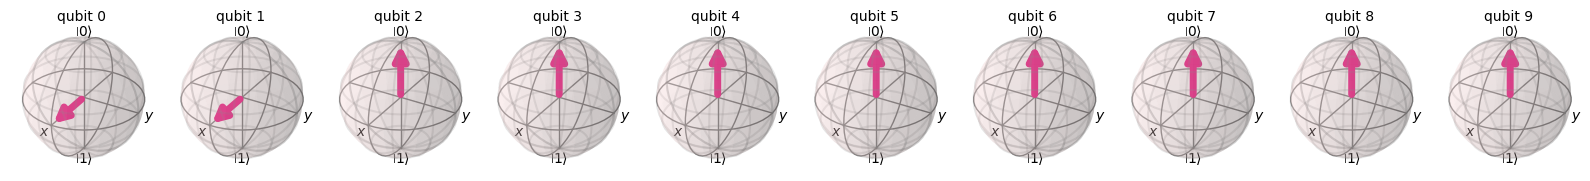

In [24]:
# 블로흐 구 그리기
plot_bloch_multivector(out_vector)

다음으로, 이 회로를 측정해 봅시다.

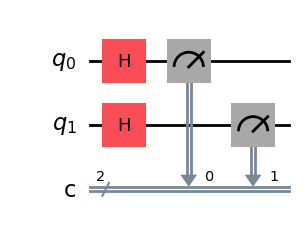

In [25]:
# 큐비트 2개(첫 번째 인수)와 고전 비트 2개(두 번째 인수)로 새 회로 생성
qc = QuantumCircuit(2, 2)

# 게이트 적용
qc.h(0)
qc.h(1)

# 측정 게이트 추가
qc.measure(0, 0)  # 큐비트 0을 측정하고 비트 0에 결과 저장
qc.measure(1, 1)  # 큐비트 1을 측정하고 비트 1에 결과 저장

# 회로 그리기
qc.draw(output="mpl")

이제 Aer 시뮬레이터를 다시 사용하여, 모든 가능한 출력 상태의 상대 확률이 대략 동일한지 실험적으로 확인합니다.

{'01': 254, '11': 259, '00': 264, '10': 247}


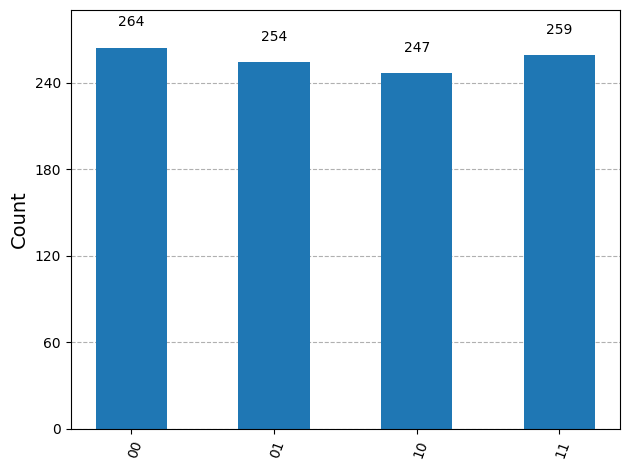

In [26]:
# 시뮬레이터에서 회로를 실행하여 결과 얻기
# 백엔드 정의
backend = AerSimulator()

# 백엔드에 트랜스파일
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

# 작업 실행
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc])
result = job.result()

# 결과 출력
counts = result[0].data.c.get_counts()
print(counts)

# 횟수를 히스토그램으로 그리기
plot_histogram(counts)

예상대로, $|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$ 상태가 각각 거의 25%씩 측정되었습니다.

In [27]:
# Qiskit 버전 확인
import qiskit

qiskit.__version__

'2.3.0'

© IBM Corp., 2017-2025